# Importando Bibliotecas e Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

sns.set_theme(style='white')
sns.color_palette('hls', 8)

# Definindo fonte
font = {'family': 'DejaVu Sans',
        'weight': 'bold',
        'size': 30
        }

# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

# Carregando dados

In [2]:
fraud_df = pd.read_csv('Fraud.csv')
fraud_df_orig = fraud_df.copy()

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
fraud_df.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6302418,683,CASH_OUT,437903.91,C1658331790,5030.00,0.00,C757823999,0.00,437903.91,0,0
2532918,205,CASH_OUT,334018.88,C1991736721,0.00,0.00,C909195604,768514.87,1102533.74,0,0
1322919,137,CASH_OUT,335195.41,C1754168770,0.00,0.00,C1812223930,2338283.08,2673478.49,0,0
2039229,180,PAYMENT,32739.16,C1044976085,0.00,0.00,M1322328639,0.00,0.00,0,0
893366,42,PAYMENT,8463.73,C162372822,988.00,0.00,M1629145938,0.00,0.00,0,0
4676801,331,CASH_OUT,176349.81,C416822376,0.00,0.00,C847242154,305433.15,481782.96,0,0
1320053,136,PAYMENT,2269.96,C989366647,467200.00,464930.04,M577178386,0.00,0.00,0,0
5026894,353,CASH_OUT,128365.44,C394433548,0.00,0.00,C606305344,534042.61,662408.06,0,0
5965744,406,PAYMENT,3212.73,C646185910,93.00,0.00,M961250076,0.00,0.00,0,0
4505129,325,TRANSFER,710654.35,C1619242024,10144.00,0.00,C738106879,811537.38,1522191.74,0,0


### Colunas:

* step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* amount - amount of the transaction in local currency.

* nameOrig - customer who started the transaction

* oldbalanceOrg - initial balance before the transaction

* newbalanceOrig - new balance after the transaction

* nameDest - customer who is the recipient of the transaction

* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### Balanceando o Dataset (Undersampling)

In [4]:
frauds = fraud_df[fraud_df['isFraud'] == 1]
legits = fraud_df[fraud_df['isFraud'] == 0]
legits = legits.sample(n = len(frauds), random_state=42)
df_reduced = pd.concat([frauds, legits], axis = 0)

In [5]:
df_reduced.isFraud.value_counts(normalize = True)

1    0.5
0    0.5
Name: isFraud, dtype: float64

# EDA

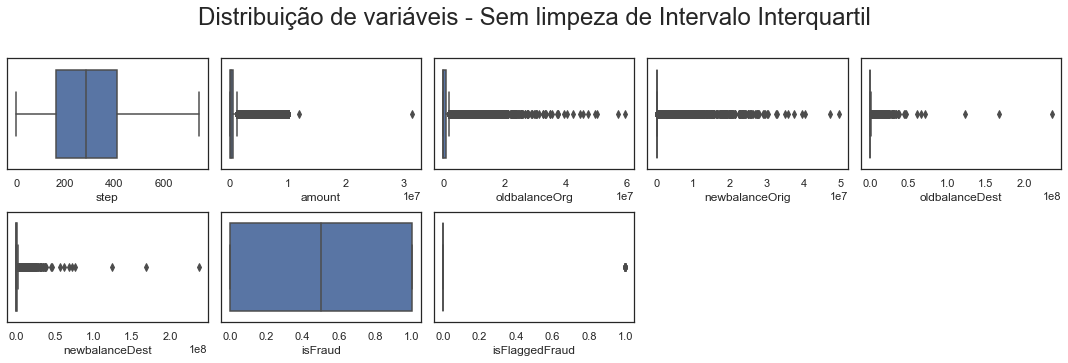

In [6]:
fig = plt.figure(figsize= (15,9))

num_cols = list(df_reduced.select_dtypes(exclude='object').columns)

for i, col in enumerate(num_cols):
    ax=fig.add_subplot(4,5,i+1)      
    sns.boxplot(x=df_reduced[col], ax=ax)
    # plt.xlabel(nome_dict[col])
    fig.tight_layout()

fig.suptitle('Distribuição de variáveis - Sem limpeza de Intervalo Interquartil\n', size = 24)
plt.subplots_adjust(top=0.90)
plt.show()

In [7]:
df_reduced.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000,16426.000000
mean,306.441556,8.248655e+05,1.242838e+06,5.257872e+05,8.311948e+05,1.260807e+06,0.500000,0.000974
std,193.321590,1.862573e+06,3.252860e+06,2.505016e+06,3.484266e+06,3.864760e+06,0.500015,0.031196
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,161.000000,3.815791e+04,1.035827e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,283.000000,1.752676e+05,1.212709e+05,0.000000e+00,0.000000e+00,1.297782e+05,0.500000,0.000000
75%,410.000000,5.404362e+05,7.979333e+05,0.000000e+00,5.283537e+05,1.091986e+06,1.000000,0.000000
max,743.000000,3.147911e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000


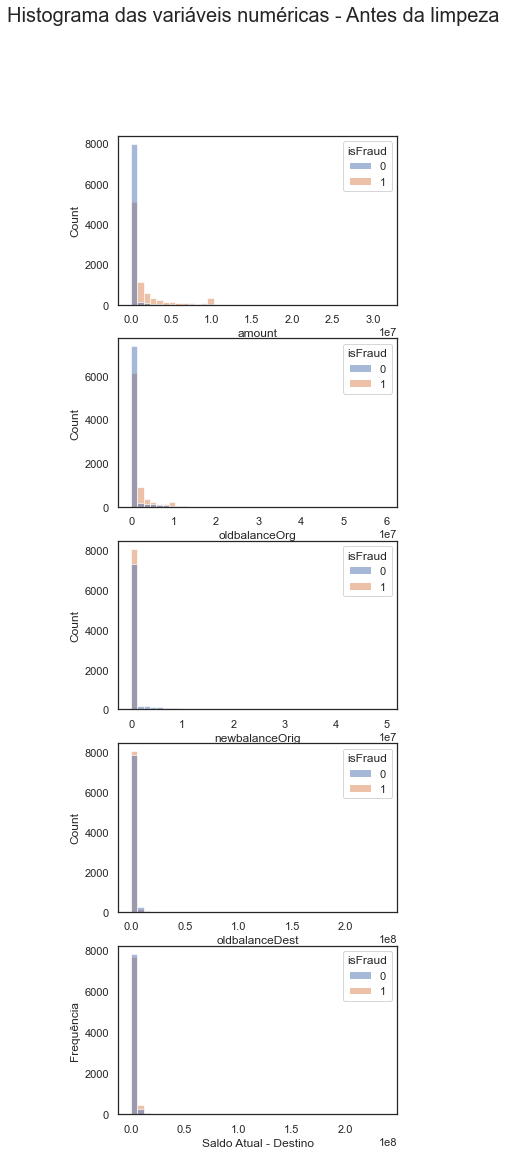

In [8]:
numericals = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

fig, axs = plt.subplots(5, 1, figsize = (5,18))

nome_colunas = {'amount': 'Montante',
                'oldbalanceOrg': 'Saldo Anterior - Origem',
                'newbalanceOrig': 'Saldo Atual - Origem',
                'oldbalanceDest': 'Saldo Anterior - Destino',
                'newbalanceDest': 'Saldo Atual - Destino'
                }

for i, col in enumerate(numericals):
    sns.histplot(data = df_reduced, x = col, hue = 'isFraud', ax = axs[i], bins=40)
    plt.xlabel(nome_colunas[col])
    plt.ylabel('Frequência')
    
fig.suptitle('Histograma das variáveis numéricas - Antes da limpeza', fontsize=20);

In [9]:
# from bokeh.plotting import figure, output_notebook, show, output_file
# from bokeh.models import ColumnDataSource

# p = figure(plot_width = 300, plot_height = 300, tools = "pan,reset,save")
# source = ColumnDataSource(data = dict(x = sample1.amount, y = sample1.index))

# p.circle(x='x', y = 'y', source=source, color = 'navy', alpha = 0.5)

# output_notebook()
# show(p)

# Data Cleaning

In [10]:
# from dataprep.eda import plot

# plot(df_reduced)

In [11]:
print('Número de linhas pré limpeza: ', df_reduced.shape[0])

df_clean = df_reduced.copy()

# Limpando as colunas numéricas (fazendo somente limite superior pois muitos valores nulos - contas sem dinheiro)

for i in ['amount', 'oldbalanceOrg', 'oldbalanceDest', 'newbalanceDest']:
    q1, q3 = np.percentile(df_clean[i], [25, 75])
    
    iqr = q3 - q1
    lim_sup = q3 + 1.5 * iqr

    indice = df_clean[(df_clean[i] >= lim_sup)].index

    df_clean.drop(indice, inplace= True)

print('Número de linhas pós limpeza: ', df_clean.shape[0])

Número de linhas pré limpeza:  16426
Número de linhas pós limpeza:  9730


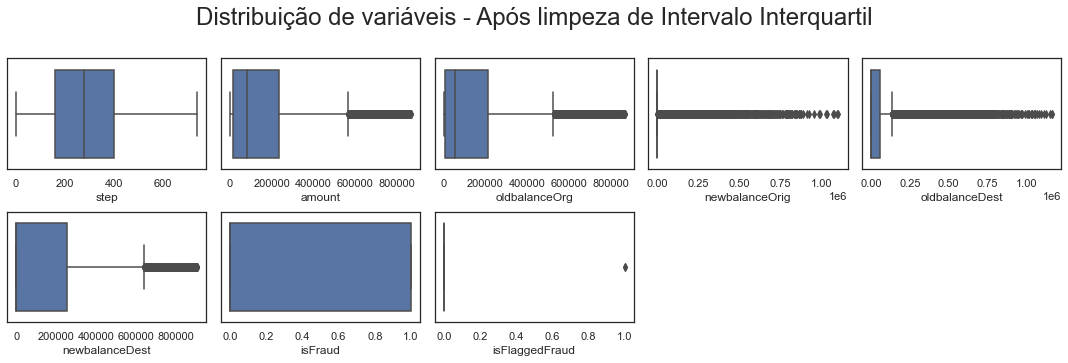

In [12]:
fig = plt.figure(figsize= (15,9))

num_cols = list(df_clean.select_dtypes(exclude='object').columns)

for i, col in enumerate(num_cols):
    ax=fig.add_subplot(4,5,i+1)      
    sns.boxplot(x=df_clean[col], ax=ax)
    # plt.xlabel(nome_dict[col])
    fig.tight_layout()

fig.suptitle('Distribuição de variáveis - Após limpeza de Intervalo Interquartil\n', size = 24)
plt.subplots_adjust(top=0.90)
plt.show()

# >>>  Modelagem  <<<

In [13]:
#Imports de Modelagem (Normalização, Splits, Modelos, Validação)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

c:\Users\Felipe\anaconda3\envs\Fraud_Deteciton_TCC_2\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Pré-processamento

In [14]:
#Normalização das variáveis numéricas

df_clean[numericals] = StandardScaler().fit_transform(df_clean[numericals])

# Codificação da coluna 'Type'ArithmeticError

codec = pd.DataFrame(df_reduced['type'].factorize()[1], columns = ['type'])
print('*Codificação da variável categórica "type":  \n\n', codec)

df_clean['type'] = df_clean['type'].factorize()[0]

*Codificação da variável categórica "type":  

        type
0  TRANSFER
1  CASH_OUT
2   PAYMENT
3   CASH_IN
4     DEBIT


In [15]:
#Definição de Features e Target

features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

X = df_clean[features]
y = df_clean['isFraud']

#Splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

### Testando Modelos com cross_val_score

In [16]:
# Criando comparação de acurácia entre os 7 modelos escolhidos

comparacao_modelos = pd.DataFrame(columns = ['Modelo', 'Score'])

modelos = [LogisticRegression('l2', solver='lbfgs', random_state=42),
           KNeighborsClassifier(n_neighbors = 41, p = 4),
           ExtraTreesClassifier(random_state = 42),
           IsolationForest(n_jobs = -1, random_state = 42),
           XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
           StackingClassifier(estimators=[('xgbc', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)),
                                          ('ifc', IsolationForest(n_jobs = -1, random_state=42))
                                          ],
                              final_estimator=LogisticRegression('l2', solver='lbfgs', random_state=42)
                              )
           ]

for model in modelos:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')
    comparacao_modelos.loc[len(comparacao_modelos)] = [model_name, scores.mean().round(4)]

comparacao_modelos.sort_values(by='Score', ascending=False)

print('* Comparação Cross-Validation Score entre modelos: ')
comparacao_modelos

c:\Users\Felipe\anaconda3\envs\Fraud_Deteciton_TCC_2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\Felipe\anaconda3\envs\Fraud_Deteciton_TCC_2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\Felipe\anaconda3\envs\Fraud_Deteciton_TCC_2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\Felipe\anaconda3\envs\Fraud_Deteciton_TCC_2\lib\site-packages

* Comparação Cross-Validation Score entre modelos: 


c:\Users\Felipe\anaconda3\envs\Fraud_Deteciton_TCC_2\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Felipe\anaconda3\envs\Fraud_Deteciton_TCC_2\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Felipe\anaconda3\envs\Fraud_Deteciton_TCC_2\lib\site-packages\sklearn\ensemble\_stacking.py", line 488, in fit
    return super().fit(X, self._le.transform(y), sample_weight)
  File "c:\Users\Felipe\anaconda3\envs\Fraud_Deteciton_TCC_2\lib\

,Modelo,Score
0,LogisticRegression,0.9747
1,KNeighborsClassifier,0.9469
2,ExtraTreesClassifier,0.9868
3,IsolationForest,0.3748
4,XGBClassifier,0.9924
5,StackingClassifier,NaN


### * Modelo Baseline: Dummy Classifier

In [17]:
dummymodel = DummyClassifier(strategy='prior')
dummymodel.fit(X_train, y_train)

y_pred_dummy = dummymodel.predict(X_test)

Acurácia:  0.5413


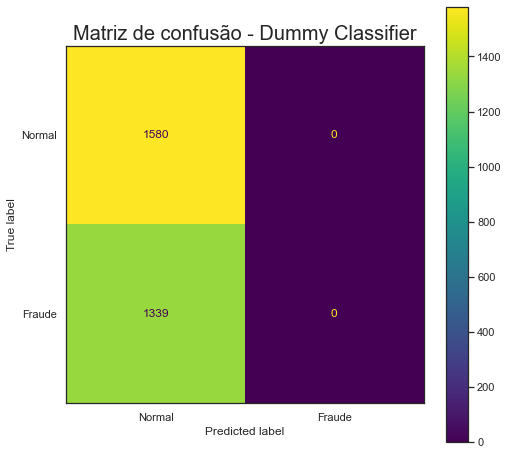

In [18]:
print('Acurácia: ', accuracy_score(y_test, y_pred_dummy).round(4))
cmd1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dummy), display_labels=['Normal', 'Fraude'])
fig, ax = plt.subplots(figsize=(8,8))
plt.grid(False)
cmd1.plot(ax=ax)
plt.rc('font', **font)
plt.title('Matriz de confusão - Dummy Classifier', fontsize = 20)
plt.show()

### * 1º Modelo: Extra Trees Classifier

In [19]:
#Fazer BayesSearchCV para ExtraTrees
xtc = ExtraTreesClassifier(warm_start = True, n_jobs = -1, random_state=42)

In [20]:
from skopt.space import Real, Integer, Categorical
from skopt import BayesSearchCV

xtc_param_dict = {'n_estimators': Integer(2, 1000),
                  'criterion': Categorical(['gini', 'entropy']),
                  'max_depth': Integer(1, 14),
                  'bootstrap': Categorical([True, False])
                  }

bayessearch_xtc = BayesSearchCV(xtc,
                                search_spaces = xtc_param_dict,
                                scoring = 'f1',
                                cv = 3,
                                refit = 'recall',
                                verbose = 1,
                                n_jobs = -1,
                                random_state = 42
                                ).fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi


Melhores Parâmetros:  OrderedDict([('bootstrap', False), ('criterion', 'gini'), ('max_depth', 14), ('n_estimators', 301)]) 
 Melhor Score:  0.9796699569581108 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1580
           1       0.97      0.99      0.98      1339

    accuracy                           0.98      2919
   macro avg       0.98      0.98      0.98      2919
weighted avg       0.98      0.98      0.98      2919



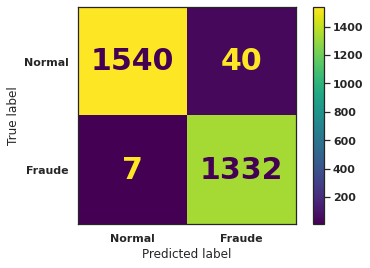

In [22]:
print('\nMelhores Parâmetros: ', bayessearch_xtc.best_params_, '\n Melhor Score: ', bayessearch_xtc.best_score_, '\n', classification_report(y_test, bayessearch_xtc.predict(X_test)))
xtc_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, bayessearch_xtc.predict(X_test)), display_labels=['Normal', 'Fraude']).plot()

#### Feature Importance (a título de curiosidade)

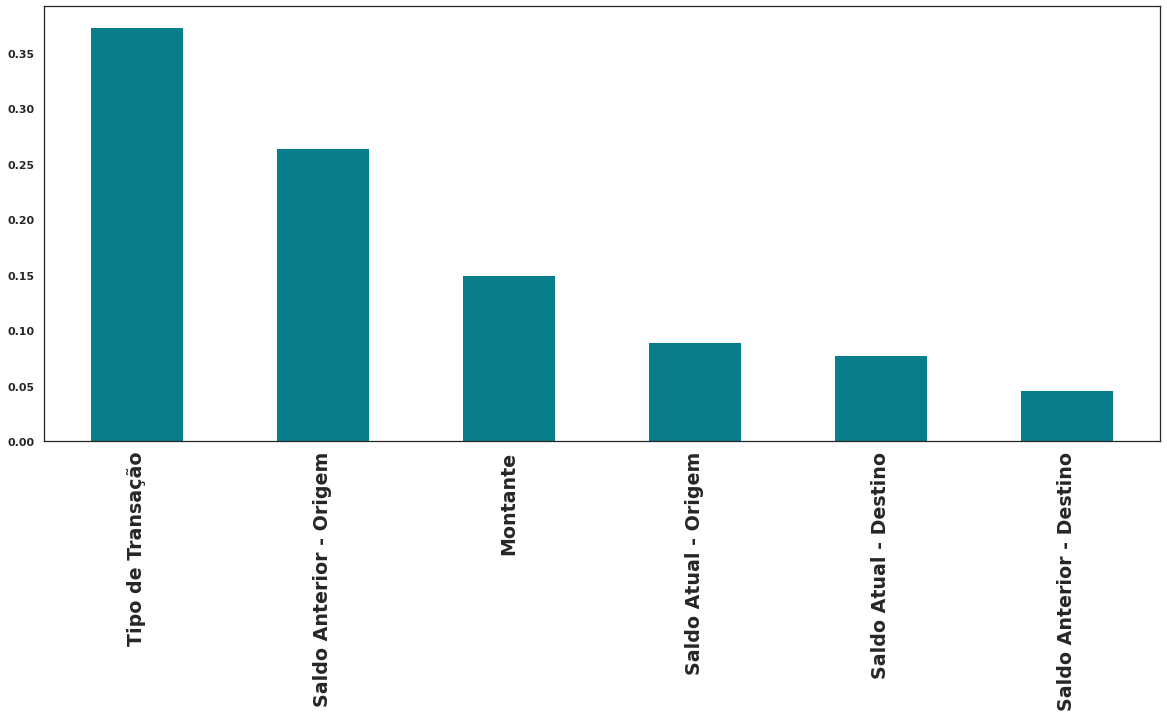

In [23]:
feats_ptbr = ['Tipo de Transação', 'Montante', 'Saldo Anterior - Origem', 'Saldo Atual - Origem', 'Saldo Anterior - Destino', 'Saldo Atual - Destino']

feat_importance = pd.Series(xtc.fit(X_train, y_train).feature_importances_, index=feats_ptbr).sort_values(ascending=False)

plt.figure(figsize=(20,8))
feat_importance.plot(kind='bar', color='#087E8B')
plt.xticks(fontsize=19);

### * 2º Modelo: XGBoost Classifier

In [24]:
#Fazer BayesSearchCV para XGBoost
xgbc = XGBClassifier(eval_metric = 'logloss', use_label_encoder = False, n_jobs = -1)

In [25]:
xgbc_param_dict = {'learning_rate': Real(0.1, 0.9),
                   'max_depth': Integer(3,8),
                   'max_leaves': Integer(10, 100),
                   'n_estimators': Integer(100, 900),
                #    'bootstrap': Categorical([True, False])
                   }

bayessearch_xgbc = BayesSearchCV(xgbc,
                                 search_spaces = xgbc_param_dict,
                                 scoring = 'recall',
                                 cv = 3,
                                 refit = 'recall',
                                 verbose = 1,
                                 n_jobs = -1,
                                 random_state = 42
                                 ).fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

c:\Users\Felipe\anaconda3\envs\Fraud_Deteciton_TCC_2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:03:50] WARNING: ..\src\learner.cc:576: 
Parameters: { "bootstrap" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.





Melhores Parâmetros:  OrderedDict([('bootstrap', False), ('learning_rate', 0.8847252354126154), ('max_depth', 5), ('max_leaves', 10), ('n_estimators', 364)]) 
 Melhor Score:  0.9977585654819084 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1580
           1       0.99      1.00      0.99      1339

    accuracy                           0.99      2919
   macro avg       0.99      0.99      0.99      2919
weighted avg       0.99      0.99      0.99      2919



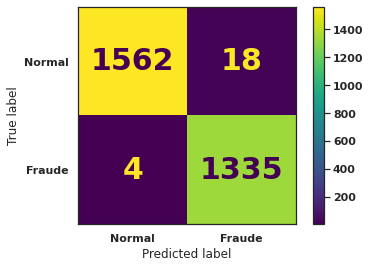

In [26]:
print('\nMelhores Parâmetros: ', bayessearch_xgbc.best_params_, '\n Melhor Score: ', bayessearch_xgbc.best_score_, '\n', classification_report(y_test, bayessearch_xgbc.predict(X_test)))
xgbc_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, bayessearch_xgbc.predict(X_test)), display_labels=['Normal', 'Fraude']).plot()

### * 3º Modelo: Isolation Forest Classifier

Capaz que vale a pena rodar com TODOS os dados, mesmo com a assimetria, já que se trata de algoritmo de detecção de anomalias.
Precisamos fazer um X e y pré-processados com todos os dados

In [27]:
#Fazer BayesSearchCV para Isolation Forest

ifc = IsolationForest(warm_start = True, n_jobs = -1, random_state = 42).fit(X_train)

In [ ]:
# ifc_param_dict = {'n_estimators': Integer(2, 1000),
#                   'bootstrap': Categorical([True, False]),
#                   'max_features': Integer(1, 6)
#                   }

# bayessearch_ifc = BayesSearchCV(ifc,
#                                 search_spaces = ifc_param_dict,
#                                 scoring = 'recall',
#                                 cv = 3,
#                                 refit = 'recall',
#                                 verbose = 1,
#                                 n_jobs = -1,
#                                 random_state = 42
#                                 ).fit(X_train, y_train)

In [ ]:
# print('\nMelhores Parâmetros: ', bayessearch_ifc.best_params_, '\n Melhor Score: ', bayessearch_ifc.best_score_, '\n', classification_report(y_test, bayessearch_ifc.predict(X_test)))
# ifc_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, bayessearch_ifc.predict(X_test))).plot()

c:\Users\Felipe\anaconda3\envs\Fraud_Deteciton_TCC_2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Felipe\anaconda3\envs\Fraud_Deteciton_TCC_2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Felipe\anaconda3\envs\Fraud_Deteciton_TCC_2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      1580
           1       0.48      0.82      0.61      1339

    accuracy                           0.38      2919
   macro avg       0.16      0.27      0.20      2919
weighted avg       0.22      0.38      0.28      2919



ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

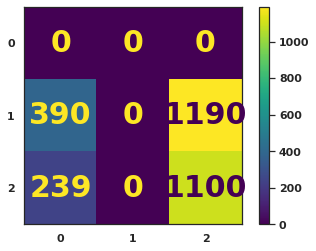

In [28]:
print(classification_report(y_test, ifc.predict(X_test)))
ifc_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, ifc.predict(X_test)), display_labels=['Normal', 'Fraude']).plot()

### * 4º Modelo: Stacking Classifier

In [29]:
# StackingClassifier

stack = StackingClassifier(estimators = [('xgbc', bayessearch_xgbc.best_estimator_),
                                         ('ifc', ifc)
                                         ],
                           final_estimator = LogisticRegression(random_state = 42, n_jobs = -1, max_iter = 100),
                           n_jobs = -1,
                           passthrough = True
                           ).fit(X_train, y_train)

ValueError: The estimator IsolationForest should be a classifier.

In [ ]:
print(classification_report(y_test, stack.predict(X_test)))
stack_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, stack.predict(X_test)), display_labels=['Normal', 'Fraude']).plot()

## Comparativo Final dos Modelos

### Tabela de Métricas

In [ ]:
comparativo_final_metricas = pd.DataFrame(columns = ['Acurácia', 'Recall', 'FN', 'F1-Score', 'AUROC'])

y_pred_dummy = dummymodel.predict(X_test)
y_pred_xt = bayessearch_xtc.predict(X_test)
y_pred_xgbc = bayessearch_xgbc.predict(X_test)
y_pred_ifc = bayessearch_ifc.predict(X_test)
y_pred_stack = stack.predict(X_test)


comparativo_final_metricas.loc['Dummy'] = [accuracy_score(y_test, y_pred_dummy).round(4),
                                           recall_score(y_test, y_pred_dummy, average='macro').round(4),
                                           confusion_matrix(y_test, y_pred_dummy)[1][0],
                                           f1_score(y_test, y_pred_dummy, average='macro').round(4),
                                           roc_auc_score(y_test, y_pred_dummy).round(4)
                                           ]

comparativo_final_metricas.loc['Extra Trees'] = [accuracy_score(y_test, y_pred_xt).round(4),
                                                 recall_score(y_test, y_pred_xt, average='macro').round(4),
                                                 confusion_matrix(y_test, y_pred_xt)[1][0],
                                                 f1_score(y_test, y_pred_xt, average='macro').round(4),
                                                 roc_auc_score(y_test, y_pred_xt).round(4)
                                                 ]

comparativo_final_metricas.loc['XGBoost'] = [accuracy_score(y_test, y_pred_xgbc).round(4),
                                             recall_score(y_test, y_pred_xgbc, average='macro').round(4),
                                             confusion_matrix(y_test, y_pred_xgbc)[1][0],
                                             f1_score(y_test, y_pred_xgbc, average='macro').round(4),
                                             roc_auc_score(y_test, y_pred_xgbc).round(4)
                                             ]

comparativo_final_metricas.loc['Isolation Forest'] = [accuracy_score(y_test, y_pred_xgbc).round(4),
                                                      recall_score(y_test, y_pred_xgbc, average='macro').round(4),
                                                      confusion_matrix(y_test, y_pred_xgbc)[1][0],
                                                      f1_score(y_test, y_pred_xgbc, average='macro').round(4),
                                                      roc_auc_score(y_test, y_pred_xgbc).round(4)
                                                      ]

comparativo_final_metricas.loc['Stacking'] = [accuracy_score(y_test, y_pred_stack).round(4),
                                              recall_score(y_test, y_pred_stack, average='macro').round(4),
                                              confusion_matrix(y_test, y_pred_stack)[1][0],
                                              f1_score(y_test, y_pred_stack, average='macro').round(4),
                                              roc_auc_score(y_test, y_pred_stack).round(4)
                                              ]

In [ ]:
comparativo_final_metricas = comparativo_final_metricas.sort_values(by='Recall', ascending=False)
comparativo_final_metricas

### Curvas ROC

In [ ]:
d_auc = roc_auc_score(y_test, dummymodel.predict(X_test)) #Dummy AUC
xtc_auc = roc_auc_score(y_test, bayessearch_xtc.predict(X_test)) #ExtraTrees AUC
xgb_auc = roc_auc_score(y_test, bayessearch_xgbc.predict(X_test)) #XGBoost AUC
ifc_auc = roc_auc_score(y_test, bayessearch_ifc.predict(X_test)) #Isolation Forest AUC
stack_auc = roc_auc_score(y_test, stack.predict(X_test)) #Stacking AUC

d_fpr, d_tpr, _ = roc_curve(y_test, dummymodel.predict(X_test)) #Dummy
xtc_fpr, xtc_tpr, _ = roc_curve(y_test, bayessearch_xtc.predict(X_test)) #ExtraTrees
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, bayessearch_xgbc.predict(X_test)) #XGBoost
ifc_fpr, ifc_tpr, _ = roc_curve(y_test, bayessearch_ifc.predict(X_test)) #Isolation Forest
stack_fpr, stack_tpr, _ = roc_curve(y_test, stack.predict(X_test)) #Stacking

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

plt.plot(d_fpr, d_tpr, linestyle='--', label='Dummy Model (AUROC = %0.3f)' % d_auc)
plt.plot(xtc_fpr, xtc_tpr, marker='.', label='Extra Trees (AUROC = %0.3f)' % xtc_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost (AUROC = %0.3f)' % xgb_auc)
plt.plot(ifc_fpr, ifc_tpr, marker='.', label='Isolation Forest (AUROC = %0.3f)' % ifc_auc)
plt.plot(stack_fpr, stack_tpr, marker='.', label='Stacking (AUROC = %0.3f)' % stack_auc)

# Title
plt.title('ROC - Modelos', fontsize = 30)
0# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Pickle e Simulação de Deploy

## Fim